<span style="font-size:22px; font-weight:700">Model Import</span>

In [36]:
import pypsa
import numpy as np
import matplotlib.pyplot as plt

n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/TZ-APG v1/tz-apg-v1_scenario-bau.nc")

INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 7/7 [00:00<00:00, 127.29it/s]
INFO:linopy.io: Writing time: 0.59s


Running HiGHS 1.11.0 (git hash: 364c83a): Copyright (c) 2025 HiGHS under MIT licence terms
LP   linopy-problem-0av90mon has 256259 rows; 77486 cols; 549484 nonzeros
Coefficient ranges:
  Matrix [1e-03, 6e+00]
  Cost   [4e-01, 1e+09]
  Bound  [0e+00, 0e+00]
  RHS    [5e-02, 2e+11]
Presolving model
86999 rows, 55762 cols, 292321 nonzeros  0s
Dependent equations search running on 7200 equations with time limit of 1000.00s
Dependent equations search removed 0 rows and 0 nonzeros in 0.00s (limit = 1000.00s)
86995 rows, 55375 cols, 291926 nonzeros  0s
Presolve : Reductions: rows 86995(-169264); columns 55375(-22111); elements 291926(-257558)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 2400(8.12934e+06) 0s
      26954     1.9911296788e+08 Pr: 0(0); Du: 0(1.08104e-10) 1s
Solving the original LP from the solution after postsolve
Model name          : linopy-problem-0av90mon
Model s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77486 primals, 256259 duals
Objective: 1.99e+08
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Link-fix-p-lower, Link-fix-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


<Axes: title={'center': 'Generator in GWh'}, xlabel='carrier'>

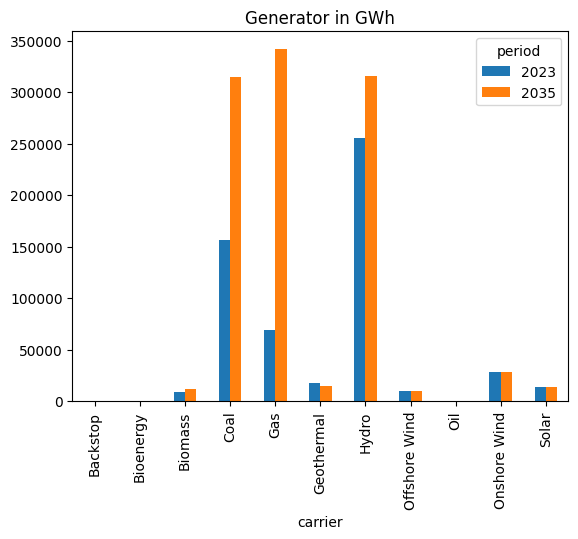

In [37]:
n.optimize(n.snapshots[:100]);  # Optimize for the first 100 snapshots
n.statistics.supply(comps=["Generator"]).droplevel(0).div(1e3).plot.bar(
    title="Generator in GWh"
)

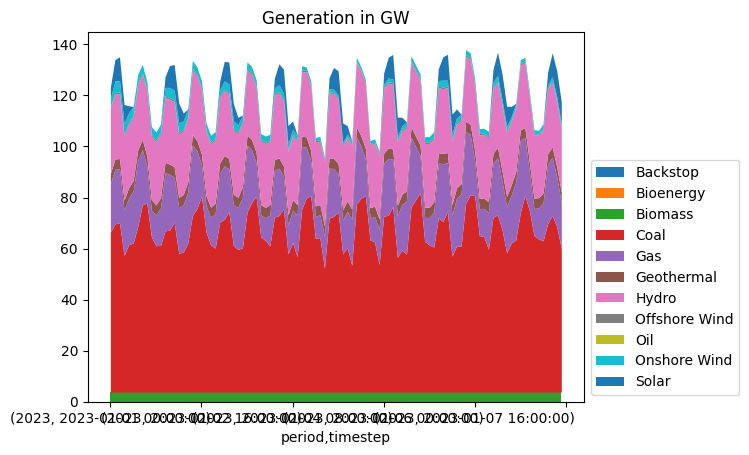

In [38]:
fig, ax = plt.subplots()
n.statistics.supply(comps=["Generator"], aggregate_time=False).droplevel(0).iloc[
    :, :100
].div(1e3).T.plot.area(
    title="Generation in GW",
    ax=ax,
    legend=False,
    linewidth=0,
)
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)

In [39]:
df = n.statistics.energy_balance()
print(df)
print(df.columns)

period                                          2023          2035
component   carrier       bus_carrier                             
Generator   Backstop      Transmission           NaN           NaN
            Bioenergy     Transmission           NaN           NaN
            Biomass       Transmission  8.878784e+06  1.181262e+07
            Coal          Transmission  1.561714e+08  3.142446e+08
            Gas           Transmission  6.871440e+07  3.417747e+08
            Geothermal    Transmission  1.766454e+07  1.498350e+07
            Hydro         Transmission  2.553943e+08  3.154067e+08
            Offshore Wind Transmission  9.484855e+06  9.697872e+06
            Oil           Transmission  1.422159e+02  1.841502e+03
            Onshore Wind  Transmission  2.825016e+07  2.856369e+07
            Solar         Transmission  1.369434e+07  1.374165e+07
Link        Transmission  Transmission -2.828646e+06 -2.407739e+06
Load        -             Transmission -5.527006e+08 -1.035270

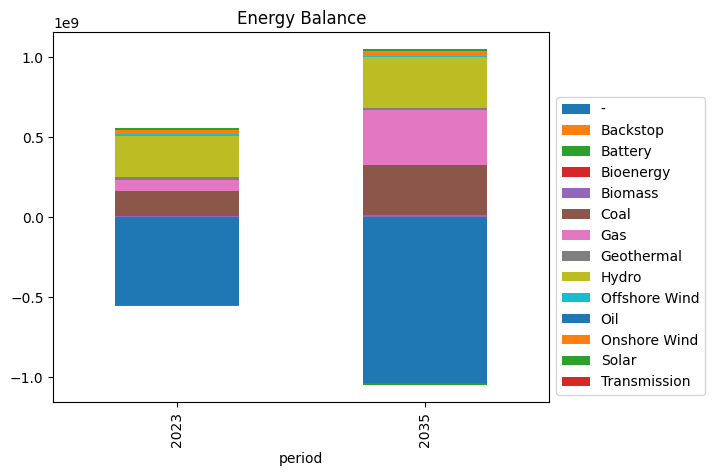

In [40]:
fig, ax = plt.subplots()

# Group by carrier and sum across components/bus_carrier
n.statistics.energy_balance().groupby("carrier").sum().T.plot(
    kind="bar", stacked=True, ax=ax, title="Energy Balance"
)

# Adjust legend
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.show()